In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Memory-test-on-drugged-islanders-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Memory-test-on-drugged-islanders-data\Islander_data.csv


In [68]:
df = pd.read_csv('DataSets/Memory-test-on-drugged-islanders-data/Islander_data.csv')
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [69]:
df.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [71]:
# PRINT UNIQUE VALUES FOR EACH COLUMN

for column in df.columns:
    print(column)
    print(df[column].unique())
    print('')

first_name
['Bastian' 'Evan' 'Florencia' 'Holly' 'Justin' 'Liam' 'Ava' 'Jamie'
 'Josefa' 'Mark' 'Maximiliano' 'Ayano' 'Grace' 'Ai' 'Kaito' 'Jun' 'Takuya'
 'Justine' 'Nik' 'Carlos' 'Anna' 'Daichi' 'Dean' 'Riley' 'Sofia' 'Darren'
 'Fernado' 'Misaki' 'Orla' 'Robert' 'Valentina' 'Ryan' 'Jose' 'Shota'
 'Anthony' 'Nina' 'Lara' 'Daiki' 'Felipe' 'Camila' 'Hama' 'Miki' 'Riko'
 'Benjamin' 'Hina' 'Kevin' 'Takahiro' 'Megan' 'Akane' 'Ren' 'Laura'
 'Ariane' 'Naoto' 'Jade' 'Tomax' 'Ami' 'Mai' 'Yuta' 'Marianne' 'Mathis'
 'Martina' 'William' 'Tatsuya' 'Raphael' 'Fabian' 'Paula' 'Sho'
 'Frederique' 'Killian' 'Jeremy' 'Lan' 'Riku' 'Rin' 'Karin' 'Christian'
 'Ignacio' 'Joaquin' 'Momoko' 'Sara' 'Alejandra' 'Rok' 'Carla' 'Alexia'
 'Nanami' 'Victor' 'Sophia' 'Kana' 'Aya' 'Eva' 'Shun' 'Adam' 'Ayaka'
 'Ryouta' 'Antoine' 'Ciara' 'Mitsuku' 'Takumi' 'Kenta' 'Pia' 'Erin'
 'Michael' 'Sakura' 'Chloe' 'Tobias' 'Shauna' 'Ross' 'Daniel' 'Asuka'
 'Emma' 'Nathan' 'Akira' 'David' 'Manuel' 'Sean' 'Sebastian' 'Sophie'
 'Die

In [72]:
missing_percentage=df.isna().sum()*100/df.shape[0]
missing_percentage

first_name          0.0
last_name           0.0
age                 0.0
Happy_Sad_group     0.0
Dosage              0.0
Drug                0.0
Mem_Score_Before    0.0
Mem_Score_After     0.0
Diff                0.0
dtype: float64

In [73]:
# BIN AGE GROUPS and DIFF CATEGORIES

df['age_cat'] = np.nan
df['diff_cat'] = np.nan


for col in [df]:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'young adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'middle age'
    col.loc[col['age'] > 55, 'age_cat'] = 'senior adult'

    col.loc[col['Diff'] > 0, 'diff_cat'] = 'increase'
    col.loc[col['Diff'] < 0, 'diff_cat'] = 'decrease'
    col.loc[col['Diff'] == 0, 'diff_cat'] = 'no change'


# CREATE FULL NAME COLUMN

df['full_name']= df['first_name'] + ' ' + df['last_name']

In [74]:
# DROP FIRST_NAME & LAST_NAME COLUMNS
df.drop(columns=['first_name', 'last_name'])

# REORDER COLUMNS
df = df[['full_name', 'age', 'age_cat', 'Happy_Sad_group', 'Dosage', 'Drug',
         'Mem_Score_Before', 'Mem_Score_After', 'Diff', 'diff_cat']]

In [75]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Histogram(x=df['age'], name='AGE',xbins=dict(start=20, end=90, size=5)),
              row=1, col=1)

fig.add_trace(go.Histogram(x=df['age_cat'], name='AGE CATEGORES'), row=2, col=1)

fig.update_layout(height=1000,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="AGE AND AGE CATEGORY COUNTS")
fig.show()

In [76]:
fig = px.pie(df, values=df.index, names='Happy_Sad_group')
fig.update_layout(title_text='Happy/Sad Distribution')
fig.show()

In [77]:
fig = px.histogram(df, x="Dosage")

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="DOSAGE DISTRIBUTION")

fig.show()

In [78]:
fig = px.histogram(df, x="Drug")

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="DRUG DISTRIBUTION")

fig.show()

In [79]:
y0 = df['Mem_Score_Before']
y1 = df['Mem_Score_After']

fig = go.Figure()

fig.add_trace(go.Box(y=y0, name='Before'))
fig.add_trace(go.Box(y=y1, name='After'))

fig.show()

In [80]:
fig = px.histogram(df, x="diff_cat")

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="DIFFERENCE CATEGORIES")

fig.show()

In [83]:
# Use pd.melt to transform our dataframe and make it more usable for creating the following visualizations

df_melt = pd.melt(df, id_vars=['Happy_Sad_group', 'age', 'age_cat'], value_vars=['Mem_Score_Before', 'Mem_Score_After'])
df_melt.rename(columns={'variable':'Mem_Score'}, inplace=True)

In [82]:
fig = px.box(df_melt, x="age_cat", y='value', color='Mem_Score', points="all")
fig.update_layout(height=500,
                  width=900,
                  title_text="Mem Score Before vs Age")
fig.show()

In [84]:
x0=df_melt['Happy_Sad_group'].loc[df_melt['Mem_Score'] == 'Mem_Score_Before']
x1=df_melt['Happy_Sad_group'].loc[df_melt['Mem_Score'] == 'Mem_Score_After']

y0 = df_melt[['value']].loc[df_melt['Mem_Score'] == 'Mem_Score_Before']
y1 = df_melt[['value']].loc[df_melt['Mem_Score'] == 'Mem_Score_After']

fig = go.Figure()

fig.add_trace(go.Box(y=y0['value'], x=x0, name='Before', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['value'], x=x1, name='After', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=600,
                  width=1000,
                  title_text='Mem_Score x Happy/Sad Group',
                  yaxis_title='Mem_Score',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
                  )

fig.show()

In [85]:
fig = px.box(df, x="Drug", y="Mem_Score_After", color='Drug', points="all")
fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="Mem Score After vs Drug")
fig.show()

In [86]:
fig = px.scatter(df, x="Mem_Score_Before", y="Mem_Score_After",
                 color="Drug", size='Dosage',
                 template='plotly_dark')
fig.show()

In [87]:
drug_mem_avg = df.groupby(['Drug'])[['Mem_Score_Before', 'Mem_Score_After']].agg('mean')
drug_mem_avg.reset_index(inplace=True)
drug_mem_avg = pd.melt(drug_mem_avg, id_vars=['Drug'], value_vars=['Mem_Score_Before', 'Mem_Score_After'])

drug = ['Drug A', 'Drug T', 'Drug S']
before = drug_mem_avg['value'].loc[drug_mem_avg['variable'] == 'Mem_Score_Before']
after = drug_mem_avg['value'].loc[drug_mem_avg['variable'] == 'Mem_Score_After']
# drugs = drug_mem_avg['value'].loc[drug_mem_avg['Drug'] == 'S']

fig = go.Figure(data=[go.Bar(name='Mem Before', x=drug, y=before, marker_color='mediumvioletred'),
                      go.Bar(name='Mem After', x=drug, y=after, marker_color='dodgerblue')])

# Change the bar mode
fig.update_layout(barmode='group',
                  title_text="Mem Score Comparison by Drug Type")
fig.show()

In [88]:
x0=df['Drug'].loc[df['Dosage'] == 1]
x1=df['Drug'].loc[df['Dosage'] == 2]
x2=df['Drug'].loc[df['Dosage'] == 3]

y0 = df[['Mem_Score_Before']].loc[df['Dosage'] == 1]
y1 = df[['Mem_Score_Before']].loc[df['Dosage'] == 2]
y2 = df[['Mem_Score_Before']].loc[df['Dosage'] == 3]


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Mem_Score_Before'], x=x0, name='1 Dose', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Mem_Score_Before'], x=x1, name='2 Doses', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Mem_Score_Before'], x=x2, name='3 Doses', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=500,
                  width=1000,
                  title_text='Mem Score Before x Drug & Dosage',
                  yaxis_title='Mem Score Before',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=10,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
                  )

fig.show()

In [89]:
x0=df['Drug'].loc[df['Dosage'] == 1]
x1=df['Drug'].loc[df['Dosage'] == 2]
x2=df['Drug'].loc[df['Dosage'] == 3]

y0 = df[['Mem_Score_After']].loc[df['Dosage'] == 1]
y1 = df[['Mem_Score_After']].loc[df['Dosage'] == 2]
y2 = df[['Mem_Score_After']].loc[df['Dosage'] == 3]


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Mem_Score_After'], x=x0, name='1 Dose', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Mem_Score_After'], x=x1, name='2 Doses', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Mem_Score_After'], x=x2, name='3 Doses', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=500,
                  width=1000,
                  title_text='Mem Score After x Drug & Dosage',
                  yaxis_title='Mem Score After',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=10,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
                  )

fig.show()

In [90]:
# Add histogram data
x0 = df['Mem_Score_Before'].loc[df['Happy_Sad_group'] == 'H']
x1 = df['Mem_Score_After'].loc[df['Happy_Sad_group'] == 'H']

fig = make_subplots(rows=1, cols=2)

binstart = x0.min()
binend = x0.max()

trace0 = go.Histogram(x=x0, ybins=dict(start=20, end=120, size=10), name='Before')
trace1 = go.Histogram(x=x1, ybins=dict(start=20, end=120, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="Memory Score Before vs After of Happy Group")
fig.show()

In [91]:
# Add histogram data
x0 = df['Mem_Score_Before'].loc[df['Happy_Sad_group'] == 'S']
x1 = df['Mem_Score_After'].loc[df['Happy_Sad_group'] == 'S']

fig = make_subplots(rows=1, cols=2)

binstart = x0.min()
binend = x0.max()

trace0 = go.Histogram(x=x0, ybins=dict(start=20, end=120, size=10), name='Before')
trace1 = go.Histogram(x=x1, ybins=dict(start=20, end=120, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="Memory Score Before vs After of Sad Group")
fig.show()

In [92]:
mem_score_avg = df.groupby(['age_cat', 'Drug'])[['Mem_Score_Before', 'Mem_Score_After']].agg('mean')
mem_score_avg.reset_index(inplace=True)
mem_score_avg.rename(columns={'Mem_Score_Before':'avg_mem_score_before',
                              'Mem_Score_After':'avg_mem_score_after'}, inplace=True)
mem_score_avg = pd.melt(mem_score_avg, id_vars=['Drug', 'age_cat'], value_vars=['avg_mem_score_before', 'avg_mem_score_after'])

mem_score_avg.rename(columns={"variable":"avg_mem_score"}, inplace=True)
mem_score_avg.replace({'avg_mem_score_before': 'before', 'avg_mem_score_after':'after'}, inplace=True)
mem_score_avg

,Drug,age_cat,avg_mem_score,value
0,A,middle age,before,54.869697
1,S,middle age,before,58.192857
2,T,middle age,before,55.134615
3,A,senior adult,before,60.540000
4,S,senior adult,before,67.925000
5,T,senior adult,before,68.922222
6,A,young adult,before,61.613793
7,S,young adult,before,57.614706
8,T,young adult,before,55.453333
9,A,middle age,after,64.360606


In [93]:
# Add histogram data
y0 = df['Mem_Score_Before'].loc[df['Drug'] == 'A']
y1 = df['Mem_Score_After'].loc[df['Drug'] == 'A']

fig = make_subplots(rows=1, cols=2)

binstart = y0.min()
binend = y0.max()

trace0 = go.Histogram(y=y0, ybins=dict(start=20, end=binend, size=10), name='Before')
trace1 = go.Histogram(y=y1, ybins=dict(start=20, end=binend, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="Memory Score Before vs After of Drug A")
fig.show()

In [94]:
# Add histogram data
y0 = df['Mem_Score_Before'].loc[df['Drug'] == 'S']
y1 = df['Mem_Score_After'].loc[df['Drug'] == 'S']

fig = make_subplots(rows=1, cols=2)

binstart = y0.min()
binend = y0.max()

trace0 = go.Histogram(y=y0, ybins=dict(start=20, end=binend, size=10), name='Before')
trace1 = go.Histogram(y=y1, ybins=dict(start=20, end=binend, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="Memory Score Before vs After of Drug S")
fig.show()

In [95]:
# Add histogram data
y0 = df['Mem_Score_Before'].loc[df['Drug'] == 'T']
y1 = df['Mem_Score_After'].loc[df['Drug'] == 'T']

fig = make_subplots(rows=1, cols=2)

binstart = y0.min()
binend = y0.max()

trace0 = go.Histogram(y=y0, ybins=dict(start=20, end=binend, size=10), name='Before')
trace1 = go.Histogram(y=y1, ybins=dict(start=20, end=binend, size=10), name='After')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  title_text="Memory Score Before vs After of Drug T")
fig.show()

In [96]:
fig = px.scatter(df, x="age", y="Diff",
                 color="age_cat",
                 template='plotly_dark')
fig.update_layout(title_text="Diff vs Age")
fig.show()

In [97]:
y0 = df[['Diff']].loc[df['age_cat'] == 'young adult']
y1 = df[['Diff']].loc[df['age_cat'] == 'middle age']
y2 = df[['Diff']].loc[df['age_cat'] == 'senior adult']


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], name='Young Adult', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], name='Middle Age', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], name='Senior Adult', boxpoints="all", boxmean=True))

fig.update_layout(height=600,
                  width=1000,
                  title_text="Diff x Age Category",
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
                  )

fig.show()

In [98]:
y0 = df[['Diff']].loc[df['Drug'] == 'A']
y1 = df[['Diff']].loc[df['Drug'] == 'T']
y2 = df[['Diff']].loc[df['Drug'] == 'S']

fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], name='A: Alprazolam', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], name='T: Triazolam', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], name='S: Sugar', boxpoints="all", boxmean=True))

fig.update_layout(height=600,
                  width=1000,
                  title_text="Diff x Drug",
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2)
                  )
fig.show()

In [99]:
y0 = df[['Diff']].loc[df['Happy_Sad_group'] == 'H']
y1 = df[['Diff']].loc[df['Happy_Sad_group'] == 'S']

fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], name='Happy', boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], name='Sad', boxpoints="all", boxmean=True))

fig.update_layout(height=600,
                  width=1000,
                  title_text="Diff x Happy/Sad Group",
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2)
                  )

fig.show()

In [100]:
x0=df['Drug'].loc[df['age_cat'] == 'young adult']
x1=df['Drug'].loc[df['age_cat'] == 'middle age']
x2=df['Drug'].loc[df['age_cat'] == 'senior adult']

y0 = df[['Diff']].loc[df['age_cat'] == 'young adult']
y1 = df[['Diff']].loc[df['age_cat'] == 'middle age']
y2 = df[['Diff']].loc[df['age_cat'] == 'senior adult']


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], x=x0, name='young adult', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], x=x1, name='middle age', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], x=x2, name='senior adult', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=600,
                  width=1000,
                  title_text='Diff x Drug & Age Category',
                  yaxis_title='Diff',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=5,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
                  )

fig.show()

In [101]:
x0=df['Drug'].loc[df['Dosage'] == 1]
x1=df['Drug'].loc[df['Dosage'] == 2]
x2=df['Drug'].loc[df['Dosage'] == 3]

y0 = df[['Diff']].loc[df['Dosage'] == 1]
y1 = df[['Diff']].loc[df['Dosage'] == 2]
y2 = df[['Diff']].loc[df['Dosage'] == 3]


fig = go.Figure()

fig.add_trace(go.Box(y=y0['Diff'], x=x0, name='1 Dose', marker_size=3,  boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y1['Diff'], x=x1, name='2 Doses', marker_size=3, boxpoints="all", boxmean=True))
fig.add_trace(go.Box(y=y2['Diff'], x=x2, name='3 Doses', marker_size=3, boxpoints="all", boxmean=True))

fig.update_layout(height=500,
                  width=1000,
                  title_text='Diff x Drug & Dosage',
                  yaxis_title='Diff',
                  boxmode='group',
                  yaxis=dict(autorange=True,
                             showgrid=True,
                             zeroline=True,
                             dtick=10,
                             gridcolor='rgb(255, 255, 255)',
                             gridwidth=1,
                             zerolinecolor='rgb(255, 255, 255)',
                             zerolinewidth=2,)
                  )

fig.show()

In [102]:
# CREATE DATAFRAME CONTAINING HIGHEST 10 VALUES OF 'DIFF' COLUMN

top_10_diff = df.sort_values('Diff', ascending=False)[:10]
top_10_diff.sort_values('Diff', ascending=False, inplace=True)
# top_10_diff

In [103]:
fig = px.bar(top_10_diff, x='Diff', y='full_name', color="Drug",
             title='10 Patients with Greatest Mem Score Increase',
             text='Diff', orientation='h', hover_data=["age_cat", "Dosage", 'Happy_Sad_group'])

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total ascending'}
                  )
fig.show()

In [104]:
low_10_diff = df.sort_values('Diff', ascending=True)[:10]
low_10_diff.sort_values('Diff', ascending=True, inplace=True)
# low_10_diff

In [105]:
fig = px.bar(low_10_diff, x='Diff', y='full_name', color='Drug',
             title='10 Patients with Greatest Mem Score Decrease',
             text='Diff', orientation='h',
             hover_data=["age_cat", "Dosage", 'Happy_Sad_group'])

fig.update_layout(height=500,
                  width=800,
                  bargap=0.2,
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total ascending'}
                  )
fig.show()

In [106]:
diff_cat_count = df.groupby(['diff_cat', 'Drug'])[['Diff']].agg('count')
diff_cat_count.reset_index(inplace=True)
diff_cat_count.rename(columns={'Diff':'count'}, inplace=True)

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_count['count'].loc[diff_cat_count['Drug'] == 'A']
pie1 = diff_cat_count['count'].loc[diff_cat_count['Drug'] == 'T']
pie2 = diff_cat_count['count'].loc[diff_cat_count['Drug'] == 'S']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Alprazolam', 'Triazolam', 'Sugar'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="Alprazolam"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Triazolam"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=pie2, name="Sugar"),
              1, 3)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Drug Type")

fig.show()

In [107]:
diff_cat_hsg = df.groupby(['diff_cat', 'Happy_Sad_group'])[['Diff']].agg('count')
diff_cat_hsg.reset_index(inplace=True)
diff_cat_hsg.rename(columns={'Diff':'count'}, inplace=True)
diff_cat_hsg

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_hsg['count'].loc[diff_cat_hsg['Happy_Sad_group'] == 'H']
pie1 = diff_cat_hsg['count'].loc[diff_cat_hsg['Happy_Sad_group'] == 'S']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Happy', 'Sad'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="Happy"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Sad"), 1, 2)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Happy/Sad Group")

fig.show()

In [108]:
diff_cat_dose = df.groupby(['diff_cat', 'Dosage'])[['Diff']].agg('count')
diff_cat_dose.reset_index(inplace=True)
diff_cat_dose.rename(columns={'Diff':'count'}, inplace=True)
diff_cat_dose

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_dose['count'].loc[diff_cat_dose['Dosage'] == 1]
pie1 = diff_cat_dose['count'].loc[diff_cat_dose['Dosage'] == 2]
pie2 = diff_cat_dose['count'].loc[diff_cat_dose['Dosage'] == 3]

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1 Dose', '2 Doses', '3 Doses'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="1 Dose"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="2 Doses"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=pie2, name="3 Doses"), 1, 3)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Dosage")

fig.show()

In [109]:
diff_cat_age = df.groupby(['diff_cat', 'age_cat'])[['Diff']].agg('count')
diff_cat_age.reset_index(inplace=True)
diff_cat_age.rename(columns={'Diff':'count'}, inplace=True)

labels = ["decrease", "increase", "no change"]
pie0 = diff_cat_age['count'].loc[diff_cat_age['age_cat'] == 'young adult']
pie1 = diff_cat_age['count'].loc[diff_cat_age['age_cat'] == 'middle age']
pie2 = diff_cat_age['count'].loc[diff_cat_age['age_cat'] == 'senior adult']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Young Adult', 'Middle Age', 'Senior Adult'])

fig.add_trace(go.Pie(labels=labels, values=pie0, name="Young Adult"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Middle Adult"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=pie2, name="Senior"), 1, 3)

fig.update_traces(hoverinfo="label+name+value")

fig.update_layout(title_text="Diff Category According to Age Category")

fig.show()

In [110]:
diff_cat_age

,diff_cat,age_cat,count
0,decrease,middle age,33
1,decrease,senior adult,8
2,decrease,young adult,39
3,increase,middle age,53
4,increase,senior adult,10
5,increase,young adult,51
6,no change,middle age,1
7,no change,young adult,3


In [112]:
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('DataSets/Memory-test-on-drugged-islanders-data/Islander_data.csv')

# Happy Sad group: H = 0, S = 1
le = LabelEncoder()
le.fit(df1.Happy_Sad_group.drop_duplicates())
df1.Happy_Sad_group = le.transform(df1.Happy_Sad_group)

# Drug: A=0, S=1, T=2
le.fit(df1.Drug.drop_duplicates())
df1.Drug = le.transform(df1.Drug)

In [113]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [114]:
X = df1[['age', 'Happy_Sad_group', 'Dosage', 'Drug', 'Mem_Score_Before', 'Mem_Score_After', 'Diff']]

In [115]:
X_clus = StandardScaler().fit_transform(X)
X_clus

array([[-1.2115957 , -1.        , -1.2124665 , ...,  0.35179148,
         0.01535702, -0.48982424],
       [ 1.03977399,  1.        , -1.2124665 , ..., -1.04079408,
        -1.11799101, -0.35931743],
       [-0.87805945, -1.        , -1.2124665 , ...,  0.11015563,
        -0.32188313, -0.70422827],
       ...,
       [ 1.20654212,  1.        ,  1.23721071, ..., -1.7275486 ,
        -1.53815907, -0.06101617],
       [ 0.03916524, -1.        ,  1.23721071, ..., -0.2777335 ,
        -0.39375398, -0.25677637],
       [-0.62790726,  1.        ,  1.23721071, ..., -0.94541151,
        -1.04059164, -0.36863935]])

In [116]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_clus)
labels = k_means.labels_
print(labels)

[0 2 0 2 0 2 2 1 0 1 1 2 0 1 2 0 2 0 2 0 2 0 2 0 2 0 1 1 0 1 1 0 2 0 2 0 1
 0 1 2 1 0 2 1 0 1 1 1 1 2 2 1 0 1 1 1 1 2 0 1 1 1 2 1 1 1 1 0 1 2 0 0 2 0
 2 2 2 0 1 0 2 0 0 1 2 0 2 0 2 0 0 2 2 0 0 1 2 1 0 0 2 2 0 0 2 1 2 1 1 2 0
 2 0 0 1 0 0 2 2 0 1 2 1 1 2 0 2 0 1 1 2 1 2 2 0 0 2 1 2 0 2 0 0 2 2 2 0 0
 2 0 2 2 0 0 1 1 2 0 1 1 2 0 2 0 2 2 0 2 0 2 2 0 0 0 2 0 2 0 0 2 0 2 2 0 1
 0 0 1 1 1 1 2 0 1 1 2 0 2]


In [117]:
df['cluster'] = labels
df.head()

,full_name,age,age_cat,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,diff_cat,cluster
0,Bastian Carrasco,25,young adult,H,1,A,63.5,61.2,-2.3,decrease,0
1,Evan Carrasco,52,middle age,S,1,A,41.6,40.7,-0.9,decrease,2
2,Florencia Carrasco,29,young adult,H,1,A,59.7,55.1,-4.6,decrease,0
3,Holly Carrasco,50,middle age,S,1,A,51.7,51.2,-0.5,decrease,2
4,Justin Carrasco,52,middle age,H,1,A,47.0,47.1,0.1,increase,0


In [118]:
cluster_centers = k_means.cluster_centers_
cluster_centers

array([[-0.16301255, -1.        , -0.18897122,  0.12982238, -0.40926563,
        -0.48024135, -0.20978371],
       [ 0.15893508,  0.05454545,  0.48003776, -0.34394458,  1.09253832,
         1.31516397,  0.61592431],
       [ 0.04512125,  1.        , -0.18010253,  0.13485597, -0.43161738,
        -0.53252001, -0.2651661 ]])

In [121]:
cluster0 = df.loc[df['cluster'] == 0]
cluster1 = df.loc[df['cluster'] == 1]
cluster2 = df.loc[df['cluster'] == 2]

In [122]:
fig = px.scatter(df, x='Happy_Sad_group', y='Mem_Score_Before', color='cluster')
fig.update_layout(title='Memory Score Before Distribution by Happy/Sad Group')
fig.show()

In [123]:
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
import pylab

In [124]:
df2 = pd.read_csv('DataSets/Memory-test-on-drugged-islanders-data/Islander_data.csv')

In [125]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(X_clus)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [126]:
dist_matrix = distance_matrix(X_clus,X_clus)
print(dist_matrix)

[[0.         3.5084854  0.57387657 ... 5.36378328 3.76619497 4.37664003]
 [3.5084854  0.         3.12338304 ... 3.57306662 4.25680045 3.84683935]
 [0.57387657 3.12338304 0.         ... 5.06138384 3.6330393  4.21992853]
 ...
 [5.36378328 3.57306662 5.06138384 ... 0.         2.96862218 2.07825608]
 [3.76619497 4.25680045 3.6330393  ... 2.96862218 0.         2.30687926]
 [4.37664003 3.84683935 4.21992853 ... 2.07825608 2.30687926 0.        ]]


In [127]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\maxim\AppData\Local\Temp\ipykernel_6444\3518085107.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [128]:
df2['cluster'] = agglom.labels_
df2.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,cluster
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,0
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,0
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,0
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,0
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,0


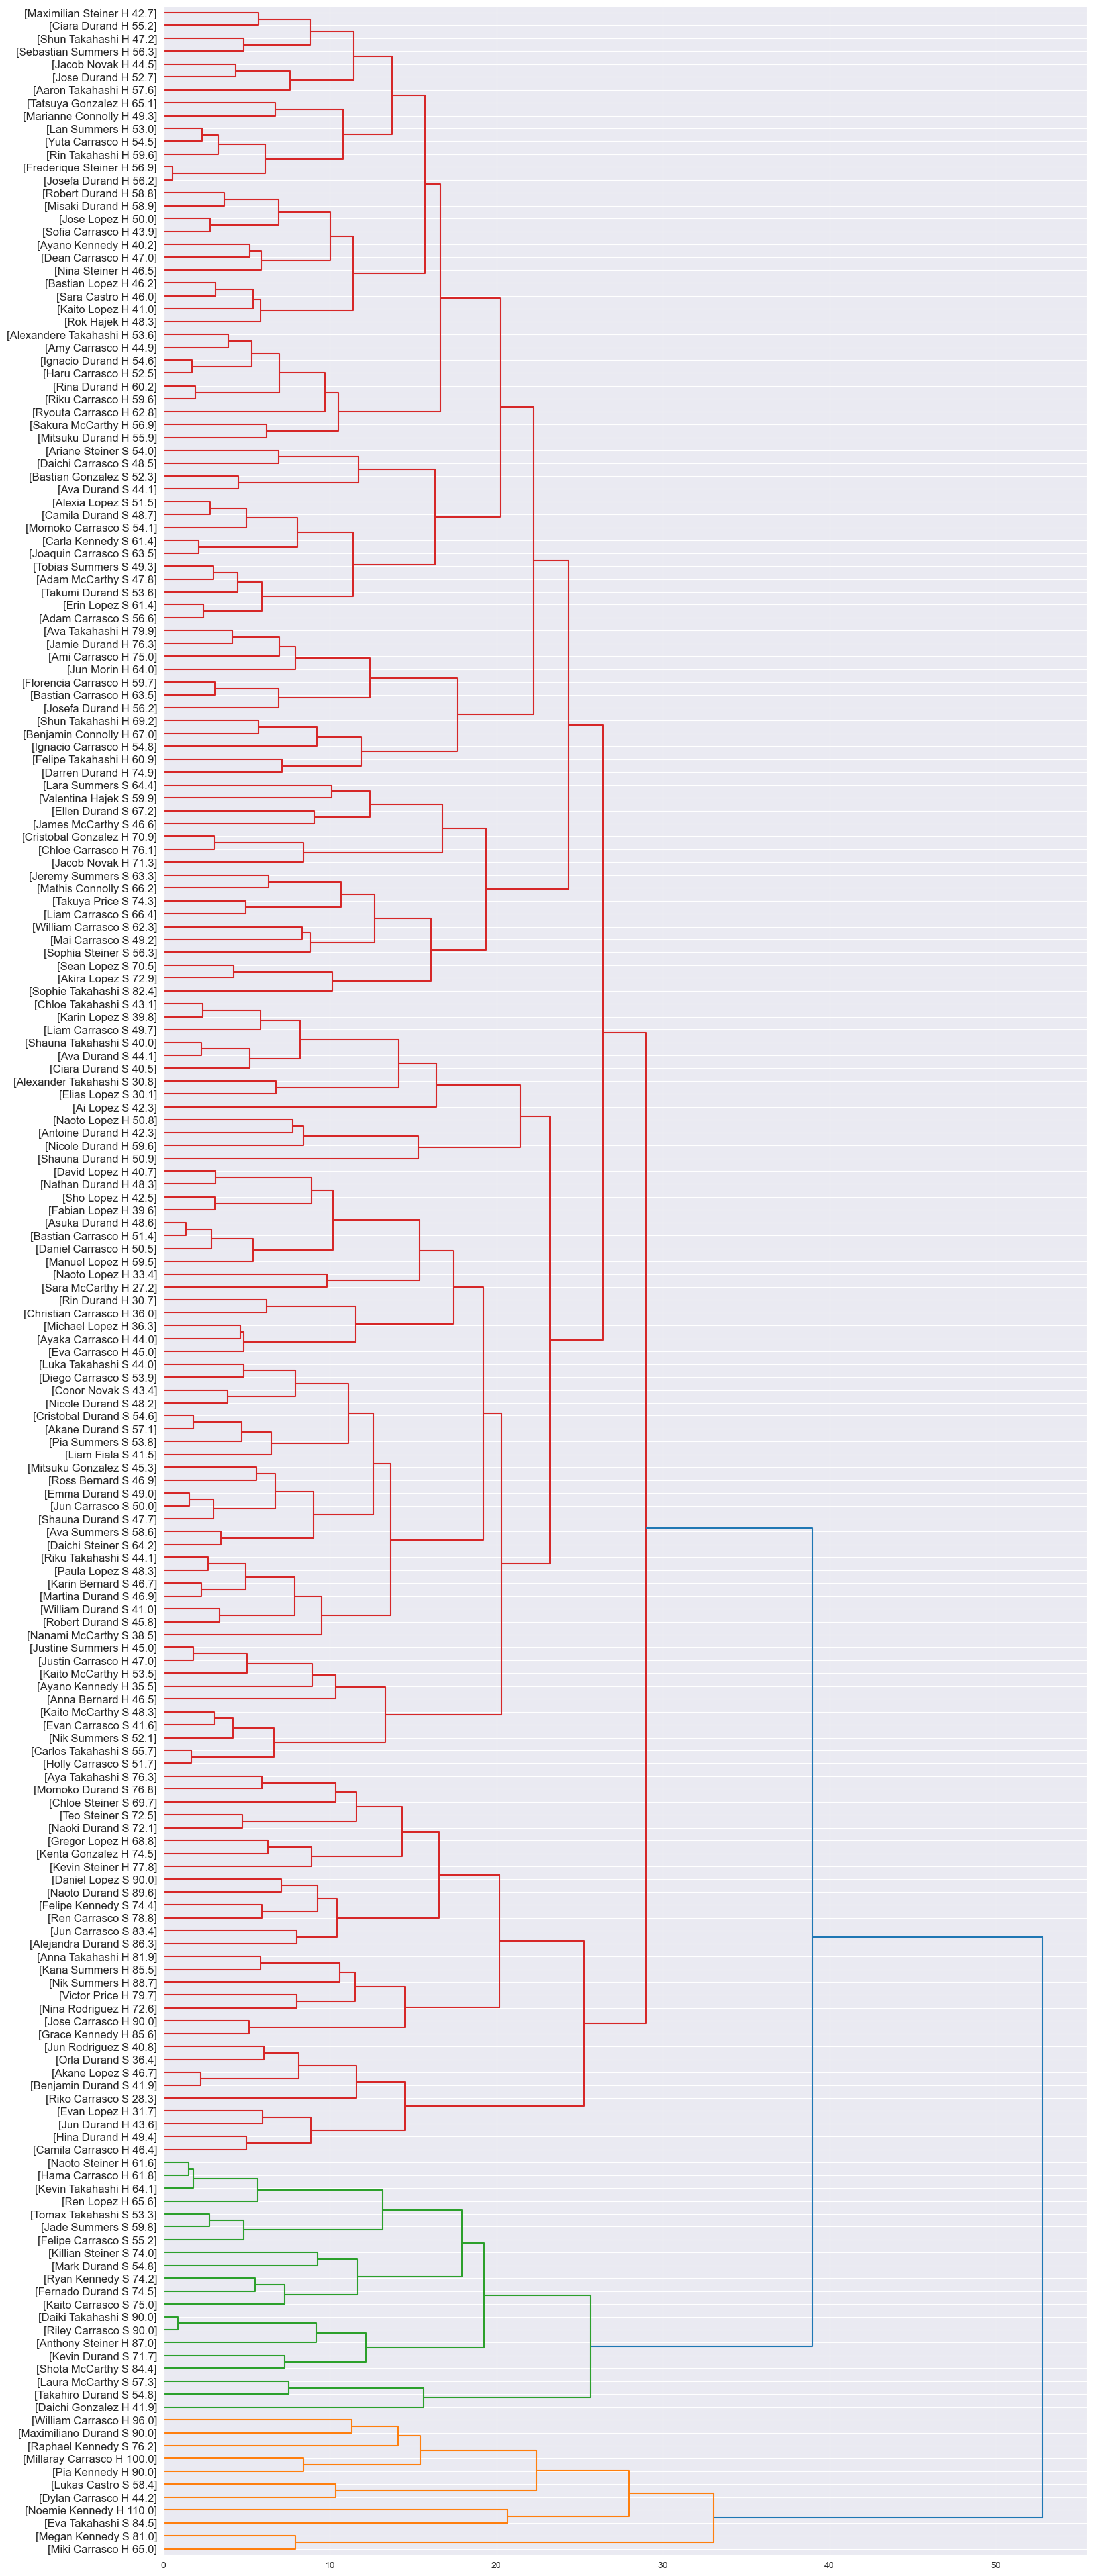

In [129]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (df2['first_name'][id], df2['last_name'][id], df2['Happy_Sad_group'][id], df2['Mem_Score_Before'][id])

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'right')